# **<font size=4 color=#BB3D00 face=微软雅黑>从信号中去除 60 Hz 杂声</font>**

美国和其他几个国家/地区的交流电以 60 Hz 的频率振荡。这些振荡通常会破坏测量结果，必须将其减去。在存在 60 Hz 电力线噪声的情况下，研究模拟仪器的输入的开环电压。电压采样频率为 1 kHz。 

## **<font size=3  face=微软雅黑>※Matlab案例</font>**

网址：https://ww2.mathworks.cn/help/signal/ug/remove-the-60-hz-hum-from-a-signal.html    
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例1：从信号中去除60Hz的电力线杂声</font>

## **<font size=3 face=微软雅黑>※Python案例</font>** 

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例1：从信号中去除60Hz的电力线杂声</font>

(0.0, 2.0)

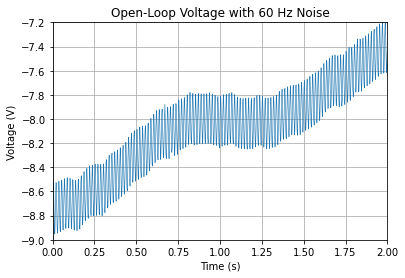

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

openLoop = loadmat('openloop60hertz.mat')
Fs = 1000
t = np.arange(len(openLoop['openLoopVoltage']))/Fs
fig,ax = plt.subplots()
ax.plot(t,openLoop['openLoopVoltage'],linewidth=0.6)
ax.set_ylabel('Voltage (V)')
ax.set_xlabel('Time (s)')
ax.set_title('Open-Loop Voltage with 60 Hz Noise')
ax.grid()
ax.set_ylim(-9,-7.2);ax.set_xlim(0,2)

使用**Butterworth**陷波滤波器消除 60 Hz 噪声。使用**designfilt**设计该滤波器。陷波的宽度定义为 59 至 61 Hz 的频率区间。滤波器至少去除该范围内频率分量的一半功率。

绘制滤波器的频率响应。请注意，此陷波滤波器提供高达30 dB的衰减。

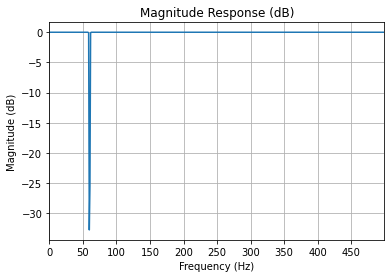

In [2]:
from scipy import signal
b,a = (signal.iirfilter(N=5,Wn=[59,61],btype='bandstop',
                        analog=False,ftype='butter',fs=Fs))
freq,h = signal.freqz(b,a,fs=Fs)
fig,ax = plt.subplots()
ax.plot(freq,20*np.log10(np.abs(h)))
ax.set_ylabel('Magnitude (dB)')
ax.set_xlabel('Frequency (Hz)')
ax.set_title('Magnitude Response (dB)')
ax.set_xticks(np.arange(0,501,50))
ax.grid()
ax.autoscale(enable=True,axis='x',tight=True)

使用**filtfilt**对信号进行滤波，来补偿滤波延迟。注意振荡是如何显著减少的。

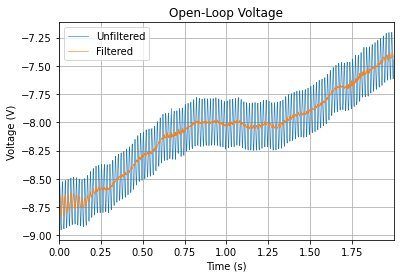

In [3]:
buttLoop = signal.filtfilt(b,a,openLoop['openLoopVoltage'].flatten())
fig,ax = plt.subplots()
ax.plot(t,openLoop['openLoopVoltage'],linewidth=0.6,label='Unfiltered')
ax.plot(t,buttLoop,linewidth=0.6,label='Filtered')
ax.set_ylabel('Voltage (V)')
ax.set_xlabel('Time (s)')
ax.set_title('Open-Loop Voltage')
ax.legend();ax.grid()
ax.autoscale(enable=True,axis='x',tight=True)

使用周期图查看 60 Hz 处的“尖峰”是否已消除。

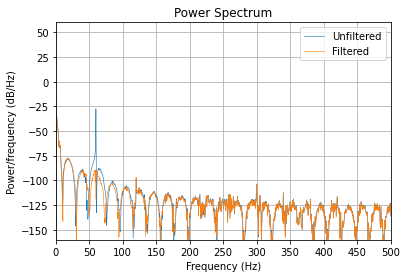

In [4]:
fopen,Popen = (signal.periodogram(openLoop['openLoopVoltage'].flatten(),
                                  fs=Fs,nfft=2048))
fbutt,Pbutt = signal.periodogram(buttLoop,fs=Fs,nfft=2048)
fig,ax = plt.subplots()
ax.plot(fopen,20*np.log10(np.abs(Popen)),linewidth=0.6,label='Unfiltered')
ax.plot(fbutt,20*np.log10(np.abs(Pbutt)),linewidth=0.6,label='Filtered')
ax.set_ylabel('Power/frequency (dB/Hz)')
ax.set_xlabel('Frequency (Hz)')
ax.set_title('Power Spectrum')
ax.set_ylim(-160,60)
ax.set_xticks(np.arange(0,501,50))
ax.legend();ax.grid()
ax.autoscale(enable=True,axis='x',tight=True)